### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python

## Week 6: Assignment (Partial notebook)

The government employed an external consultant to assist with data analysis. However, the consultant resigned and left the project in a half-completed state. The government provided you with the partially completed Jupyter Notebook that the consultant developed. They asked you to evaluate and complete the Jupyter Notebook with Python code.

This assignment activity will consist of two parts: (1) demonstrate the use of the functions provided, and (2) answer additional questions posed by the government. The questions are:

- What is the difference between qualitative and quantitative data? How can these be used in business predictions?
- Why is continuous improvement required? Can we not just implement the project and move on to other pressing matters?
- As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. Does that mean we can ignore data ethics?

In [29]:
# Libraries and settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load and select relevant subset of the data
# Make sure to change the relative path to function in your environment
ds1 = pd.read_csv('covid_19_uk_cases.csv')
ds2 = pd.read_csv('covid_19_uk_vaccinated.csv')

sample = ds1[['Province/State','Date','Hospitalised']]

In [3]:
# Select data for a specific province
sample_ci = sample[sample['Province/State'] == "Channel Islands"]

In [4]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe
    plt.plot(series[window:], label='Actual values')
    plt.grid(True)

In [30]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

### Question 1:

The consultant indicated that the function is functional, but did not demonstrate how to use it. Use the provided function, `plot_moving_average()`, to plot the data for the selected province (variable name is `sample_ci` and set the window parameter to 7 days. 

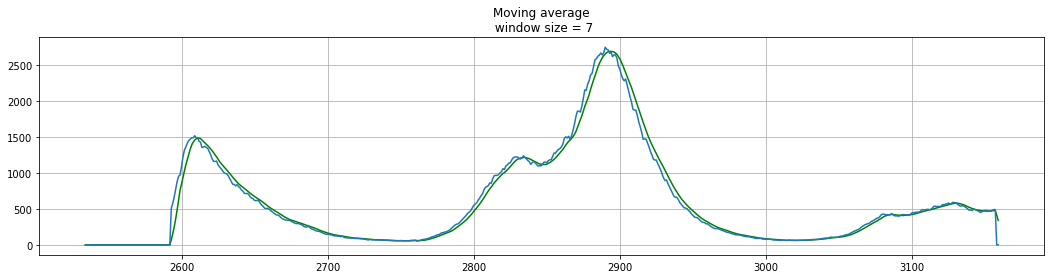

In [63]:
# Demonstrate the use of the function to plot moving averages
# YOUR CODE HERE
plot_moving_average(sample_ci['Hospitalised'], window=7)


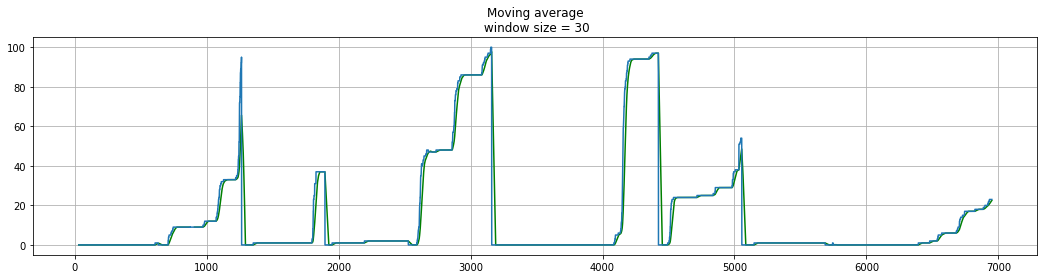

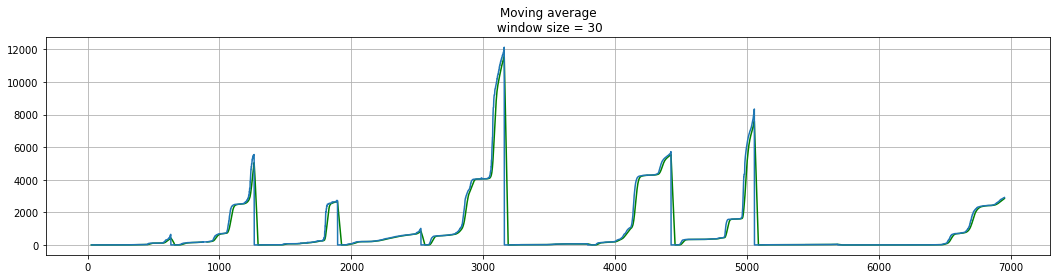

In [26]:
# Demonstrate the use of the function to plot moving averages
# MODEL ANSWER END
temp = ds1[['Province/State','Date','Deaths']]
deaths = temp[temp['Province/State'] != "Others"]
plot_moving_average(deaths['Deaths'], window=30)
temp = ds1[['Province/State','Date','Cases']]
cases = temp[temp['Province/State'] != "Others"]
plot_moving_average(cases['Cases'], window=30)

### Question 2:

The consultant performed a calculation that looks interesting, but the team is unsure about what the intention was and how to interpret the output. Can you offer some insights into the meaning of the code and output in the cell below? Is it useful?

In [51]:
# Return the top three days with biggest difference between daily value and rolling 7-day mean
s = sample_ci.copy()
s_rolling = s['Hospitalised'].rolling(window=7).mean()
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])
s.sort_values('error', ascending=False).head(10)

,Province/State,Date,Hospitalised,error
2593,Channel Islands,2020-03-27,509.0,436.285714
2594,Channel Islands,2020-03-28,579.0,423.571429
2595,Channel Islands,2020-03-29,667.0,416.285714
2596,Channel Islands,2020-03-30,777.0,415.285714
3158,Channel Islands,2021-10-13,0.0,411.428571
2597,Channel Islands,2020-03-31,882.0,394.285714
3159,Channel Islands,2021-10-14,0.0,343.571429
2598,Channel Islands,2020-04-01,955.0,330.857143
2602,Channel Islands,2020-04-05,1320.0,288.857143
2601,Channel Islands,2020-04-04,1225.0,287.142857


### Method 1

In [59]:
mae = s['error'].sum() / s.shape[0]
print("Mean Absolute Error:", mae)

Mean Absolute Error: 44.75


### Method 2

In [57]:
from sklearn.metrics import mean_absolute_error
s['rolling_mean'] = s['Hospitalised'].rolling(window=7).mean()
true_values = s['Hospitalised']
predicted_values = s['rolling_mean'].fillna(0)
print("Mean absolute error:", mean_absolute_error(true_values, predicted_values))

Mean absolute error: 44.75


The above cells show two methods of calculating MAE. The MAE of Channel Islands Hospitalised cases is 44.75 which means that on average our forecasts are off by 44.75% of the actual value.

---

### Question 3:

The management team had some additional questions around the project where they asked for further feedback to be included in your final presentation. Make sure to answer the questions in the Notebook in Markdown format in preparation for your presentation. The expectation is that you will provide short and direct responses to help them understand the importance and impact of the questions below.

> ***Note:*** You can double-click on the markdown cells to edit the text.

#### Question 3.1 (double click cell to edit)
- What is the difference between qualitative and quantitative data? How can these be used in business predictions?

- **Quantitative Data**
    Quantative data is data that can be quantified,measured or counted by giving it a numerical value. This form of data is descriptive in nature and can be used to predict the future. Quantative information cal answer quesions like "How much?" or "How many?".


    **Qualitative Data**
    Qualitative data is data that is described in terms of words or phrases. The data normally referes to words or labels that describe characteristics or traits. Qualitative data can be used to answer questions like "Why?" or "How?".
-  **Quantitative data** is fixed in nature and cannot be changed. **Qualitative data** is subjective in nature and unique.
-  **Quantitative data** data is collected by measuring and counting. **Qualitative data** is collected by observing and polling.
- **Quantitative data** can be analyzed by normal statistical analysis. **Qualitative data** on the other hand needs to be grouped before any analysis can be made on it.



#### Question 3.2 (double click cell to edit)
- Can you provide you observations around why continuous improvement is required, can we not just implement the project and move on to other pressing matters?

Continuous improvement is always critical in any system or solution deployment. It is the goal of a solution to be able to provide the best possible service to the stakeholders or end users. With every solution constant improvement is required with the addition of new data. New data changes how we see our existing data, piplines and solutions. Refactoring and improvement is critial for a solution to be successful.

#### Question 3.3 (double click cell to edit)
- As a government, we adhere to all data protection requirements and have good governance in place. Does that mean we can ignore data ethics? We only work with aggregated data and therefore will not expose any personal details? (Provide an example of how data ethics could apply to this case; two or three sentences max)

A great quote from George Orwell's book 1984 is "If you want to keep a secret, you must also hide it from yourself." In today's world, this is critial for data obfuscation for GDPR and good data governance. In our dataset all the data has been aggrigated and anonymized. We are therefore not exposing any personal details. 